<a href="https://colab.research.google.com/github/kellyneves781/clausterizacao2/blob/main/Clausteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-habits-vs-academic-performance


In [2]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(path, 'student_habits_performance.csv'))

df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Hipóteses iniciais: É interessante pensar sobre o que esse dataset pode nos trazer! Podemos ver o que influencia para que o aluno tenha uma nota maior ou menor. Acredito que as horas de estudo e a frequência nas aulas devem ser as variáveis mais importantes e que as horas em social media e netflix devem atrapalhar a nota final no exame. Com as informações acerca de trabalho de meio período, da escolaridade dos pais e da qualidade de internet podemos ver a influência de um fator socieconômico, que acredito que não só influencie nas notas mas principalmente nas outras variáveis, como exercícios, trabalho, horas de sono e entre outros. Quanto as questões de saúde mental, acredito ser quase tão importante quanto as horas de estudo, mas que têm interferência de todas as outras variáveis.

Talvez a clausterização possa ser interessante para agrupar mais os dados que são semelhantes e permitir uma melhor visualização do cenário.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os

label_encoders = {}
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   int64  
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   int64  
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   int64  
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   int64  
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   int64  
 12  internet_quality               1000 non-null   in

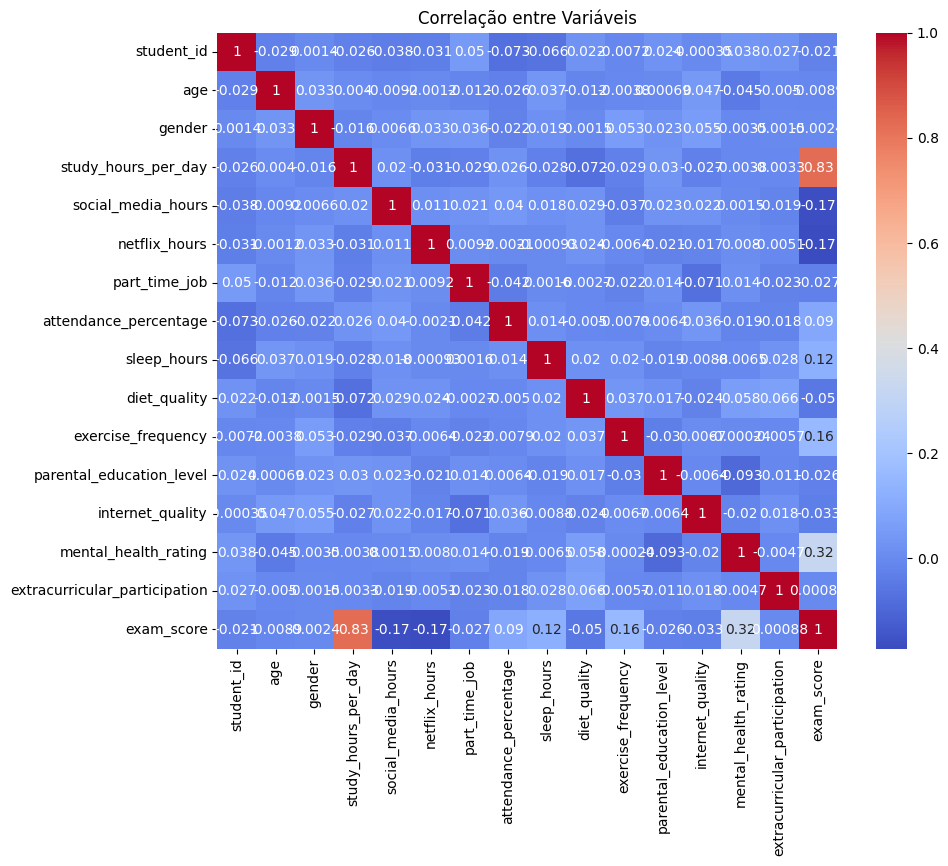

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

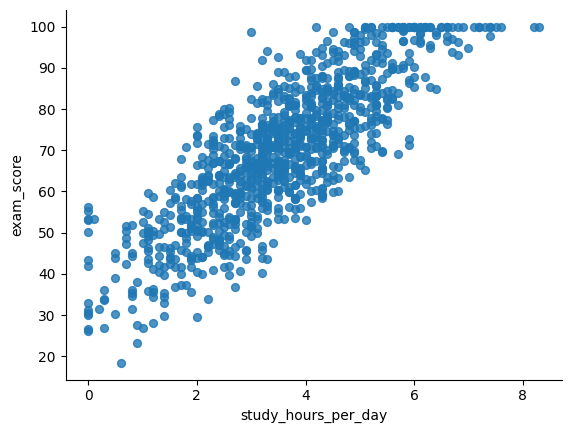

In [8]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='study_hours_per_day', y='exam_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

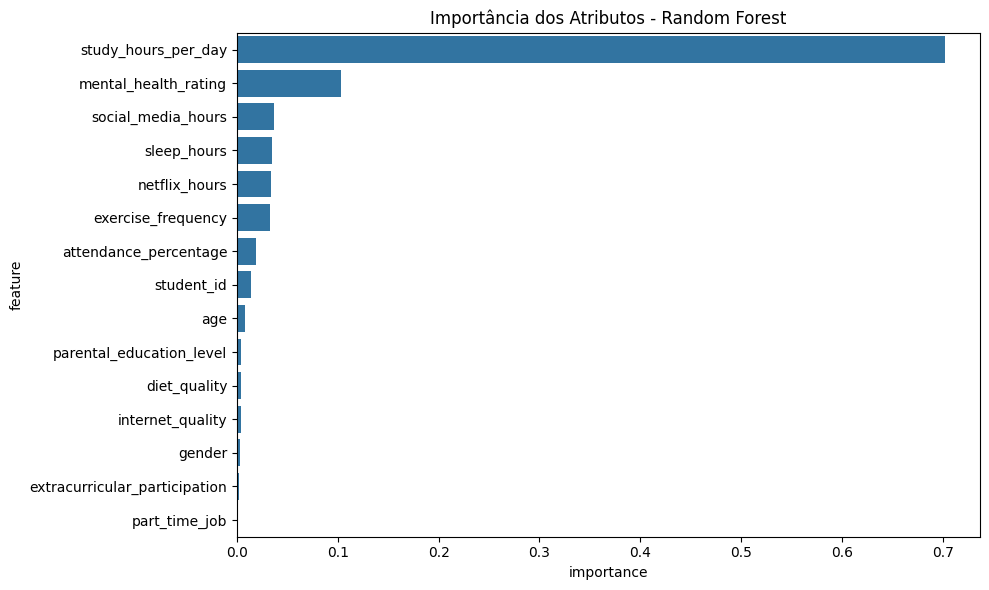

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop('exam_score', axis=1)
y = df['exam_score']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title("Importância dos Atributos - Random Forest")
plt.tight_layout()
plt.show()

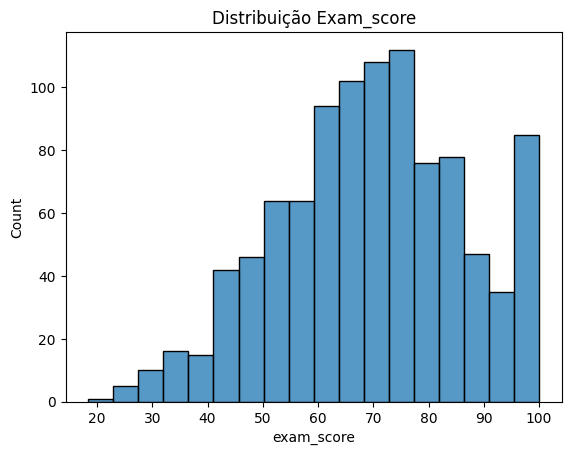

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='exam_score', data=df)
plt.title('Distribuição Exam_score')
plt.show()

Revisão das hipóteses 1: Com o quadro de importância de atributos foi possível afirmar que as horas de estudo é a variável mais importante - sendo evidenciada também no gráfico de horas estudadas por notas;  e a saúde mental, a pesar de não ser quase no mesmo nível de importância das horas de estudo, é a segunda variável mais importante em relação às outras. A importância das horas de estudo também pode ser vista no gráfico de correlação, tendo uma alta correlação com a nota; por outro lado, como previsto, as horas nas redes sociais e netflix têm uma correlação muito baixa, ou seja, quanto mais horas nas redes sociais e netflix, menor a nota.

Primeiro devemos normalizar os dados, para que todos estejam na faixa de 1 a 10 e que nenhum se sobreponha ao outro.

In [11]:
df = (df - df.min()) / (df.max() - df.min()) * 9 + 1

In [12]:
df.describe()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.500000,5.497429,3.52450,4.849506,4.131875,4.032833,2.935000,6.754211,5.328074,4.366000,5.563000,3.997000,4.469500,5.438000,3.862000,6.647224
std,2.601977,2.967557,2.58744,1.592772,1.465528,1.791863,3.699251,1.922573,1.623146,3.364649,3.038135,2.817255,3.185352,2.847501,4.193392,1.862709
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.250000,3.250000,1.00000,3.819277,3.125000,2.666667,1.000000,5.500000,4.176471,1.000000,2.500000,1.000000,1.000000,3.000000,1.000000,5.420037
50%,5.500000,4.857143,5.50000,4.795181,4.125000,4.000000,1.000000,6.809091,5.367647,5.500000,5.500000,4.000000,5.500000,5.000000,1.000000,6.746324
75%,7.750000,8.714286,5.50000,5.879518,5.125000,5.208333,1.000000,8.164205,6.426471,5.500000,8.500000,7.000000,5.500000,8.000000,10.000000,7.940257
max,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Agora, para iniciar a custerização, é necessário escolher centroides de forma aleatória.

In [13]:
def random_centroids(df, k):
    centroids = []
    for i in range(k):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [14]:
centroids = random_centroids(df, 3)
centroids

<ipython-input-13-4abe247d8d47>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = df.apply(lambda x: float(x.sample()))


,0,1,2
student_id,5.063063,3.639640,9.882883
age,7.428571,3.571429,4.857143
gender,1.000000,1.000000,10.000000
study_hours_per_day,4.144578,2.843373,3.277108
social_media_hours,1.000000,3.250000,4.875000
netflix_hours,6.333333,2.666667,2.666667
part_time_job,1.000000,10.000000,1.000000
attendance_percentage,4.804545,6.236364,7.525000
sleep_hours,7.485294,9.073529,6.029412
diet_quality,1.000000,10.000000,1.000000


Agora vamos associar cada dado do nosso dataset aos centroides mais próximos.

In [19]:
def get_labels(df,centroids):
    distances = centroids.apply (lambda x: (df - x).abs().sum(axis=1))
    distances.idxmax(axis=1)
    return distances.idxmin(axis=1)

In [20]:
labels = get_labels(df,centroids)
labels

,0
0,0
1,0
2,2
3,1
4,0
...,...
995,0
996,1
997,2
998,2


Aqui temos quantos dados do dataset foram destribuidos em cada cluster.

In [33]:
labels.value_counts()

,count
2,461
0,318
1,221


A partir do método de Elbow podemos ver pela inércia, qual o valor de k mais adequado, no caso o 3 foi escolhido por ser mais simples de interpretar.

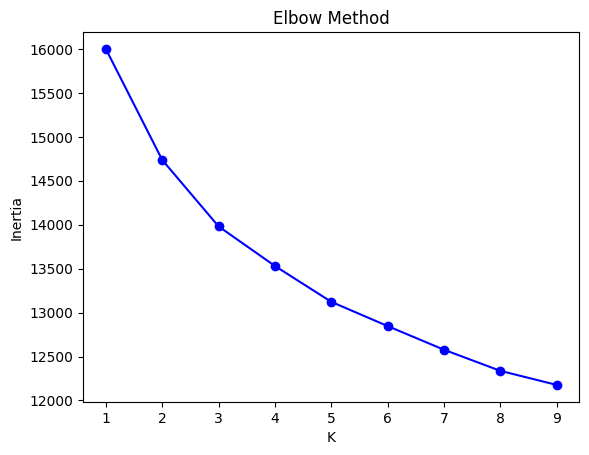

In [42]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

inertias = []
K_range = range(1, 10)
for k in K_range:

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    inertias.append(inertia)

plt.plot(K_range, inertias, 'bo-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Agora vomos calcular o centroide pela média geométrica e em seguida plotar esse processo para visualização.

In [23]:
def new_centroids(df,labels):
    return df.groupby(labels).apply(lambda x: x.mean()).T

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(df, labels, centroids, iteration):
    pca = PCA(n_components=2)
    df_2d = pca.fit_transform(df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=df_2d[:, 0], y=df_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.show()

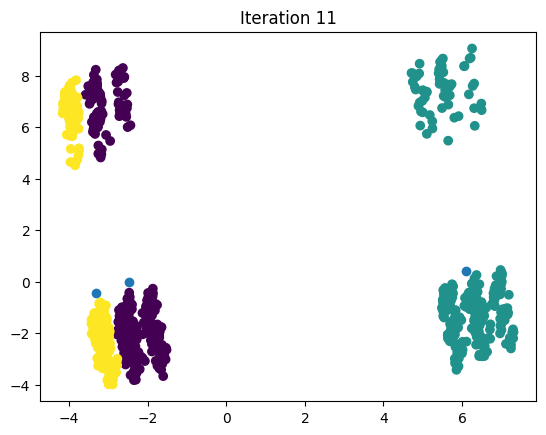

In [46]:
max_iterations = 100
k = 3
centroids = random_centroids(df, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels)
    plot_clusters(df, labels, centroids, iteration)
    iteration += 1

In [44]:
centroids

,0,1,2,3
student_id,5.694208,5.664733,5.514294,5.343087
age,5.451020,5.644727,5.221597,5.532688
gender,3.057143,3.568063,3.444882,3.736229
study_hours_per_day,5.242341,4.779285,4.936059,4.679855
social_media_hours,3.972619,4.109293,4.065945,4.229608
netflix_hours,3.830159,4.045375,3.980315,4.132062
part_time_job,4.985714,2.884817,2.700787,2.105932
attendance_percentage,6.725227,6.659162,6.771886,6.800814
sleep_hours,5.350630,5.481290,5.262390,5.273710
diet_quality,4.171429,7.149215,1.000000,4.231992


A partir dos novos centroides podemos obsetvar os clusters criados. O cluster 0 mostra um perfil de estudantes com as atividades de lazer e saude mental equilibrada, participação extracurricular e percentual de frequencia alta, com notas razoáveis.

In [36]:
df[labels == 0]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1.000000,8.714286,1.0,1.000000,2.500,2.833333,1.0,6.931818,7.352941,1.0,10.0,7.0,1.0,8.0,10.0,5.169118
3,1.027027,8.714286,1.0,2.084337,5.875,2.666667,1.0,4.068182,8.941176,10.0,7.0,7.0,5.5,1.0,10.0,1.926471
9,1.081081,2.285714,1.0,6.204819,4.875,3.166667,1.0,9.059091,6.691176,5.5,8.5,1.0,5.5,10.0,10.0,10.000000
16,1.144144,4.857143,5.5,2.084337,1.750,1.333333,1.0,8.547727,4.176471,10.0,5.5,4.0,10.0,8.0,10.0,5.058824
17,1.153153,10.000000,1.0,4.686747,4.375,3.000000,1.0,8.915909,6.691176,10.0,1.0,4.0,1.0,1.0,10.0,6.779412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,9.873874,2.285714,5.5,7.180723,4.875,1.000000,10.0,7.259091,4.308824,1.0,4.0,7.0,5.5,3.0,10.0,7.893382
988,9.900901,2.285714,5.5,4.578313,4.000,3.000000,1.0,3.352273,2.191176,1.0,7.0,1.0,1.0,8.0,10.0,6.966912
995,9.963964,6.142857,1.0,3.819277,1.625,3.666667,1.0,5.295455,6.691176,1.0,4.0,4.0,5.5,6.0,10.0,7.363971
996,9.972973,1.000000,1.0,4.144578,2.250,5.000000,10.0,7.136364,5.764706,10.0,2.5,4.0,1.0,6.0,10.0,6.238971


O cluster 1 mostra estudantes com pouco tempo de lazer, que trabalham e estudam bastante, com ótimas notas.

In [37]:
df[labels == 1]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
1,1.009009,4.857143,1.0,8.481928,4.500,4.833333,1.0,9.447727,2.852941,5.5,10.0,4.0,1.0,8.0,1.0,10.000000
7,1.063063,6.142857,1.0,5.662651,2.250,4.333333,10.0,5.438636,2.852941,1.0,1.0,1.0,1.0,8.0,1.0,6.977941
12,1.108108,3.571429,1.0,5.012048,3.625,1.666667,10.0,6.134091,2.720588,1.0,2.5,1.0,5.5,9.0,1.0,7.452206
14,1.126126,10.000000,5.5,3.602410,2.875,2.166667,1.0,7.422727,5.632353,10.0,10.0,1.0,1.0,9.0,1.0,7.672794
15,1.135135,6.142857,5.5,4.361446,7.250,2.666667,1.0,9.488636,5.367647,5.5,10.0,4.0,1.0,7.0,1.0,7.132353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,9.864865,10.000000,5.5,4.469880,4.750,1.166667,1.0,9.488636,5.764706,1.0,10.0,4.0,1.0,7.0,1.0,8.058824
987,9.891892,4.857143,1.0,3.493976,3.000,3.833333,10.0,7.095455,4.176471,1.0,2.5,4.0,1.0,9.0,1.0,5.169118
989,9.909910,10.000000,5.5,2.084337,2.750,4.500000,10.0,5.172727,3.250000,1.0,5.5,4.0,1.0,6.0,1.0,4.220588
998,9.990991,10.000000,5.5,6.855422,6.125,2.833333,10.0,10.000000,6.823529,1.0,1.0,1.0,1.0,1.0,1.0,6.658088


E no cluster 2 temos estudantes com mais tempo de redes sociais e netflix, porém com menos saúde mental e menor nota e participação extracurricular.

In [38]:
df[labels == 2]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
2,1.018018,6.142857,5.5,2.518072,4.875,3.166667,1.0,8.936364,7.352941,10.0,2.5,4.0,10.0,1.0,1.0,2.753676
4,1.036036,3.571429,1.0,6.421687,6.500,1.833333,1.0,8.138636,3.250000,1.0,5.5,7.0,5.5,1.0,1.0,6.294118
5,1.045045,10.000000,5.5,8.807229,2.625,1.000000,1.0,6.502273,6.558824,1.0,2.5,7.0,1.0,4.0,1.0,10.000000
6,1.054054,6.142857,1.0,7.072289,2.875,3.333333,10.0,7.095455,5.367647,5.5,4.0,7.0,10.0,4.0,1.0,8.875000
8,1.072072,8.714286,1.0,5.771084,3.750,3.833333,1.0,10.000000,6.161765,5.5,5.5,1.0,5.5,1.0,1.0,7.672794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,9.918919,2.285714,5.5,4.469880,5.375,3.833333,1.0,8.302273,5.367647,5.5,2.5,7.0,5.5,5.0,1.0,5.985294
991,9.927928,4.857143,5.5,7.506024,3.625,6.000000,1.0,7.279545,3.514706,5.5,4.0,4.0,5.5,3.0,1.0,8.378676
992,9.936937,2.285714,5.5,4.795181,1.000,4.166667,1.0,9.345455,5.235294,1.0,5.5,1.0,10.0,3.0,1.0,6.889706
993,9.945946,4.857143,5.5,5.120482,3.625,2.666667,1.0,7.750000,3.647059,5.5,2.5,4.0,5.5,7.0,1.0,6.790441


Revisão das hipóteses 2: A clusterização facilita muito a interpretação dos dados, levando em conta a interação de várias variáveis que é possóvel de separar os estudantes em grupos. Com isso, pode ser observado que a consciliação de diversas tarefas podem influenciar em uma nota razoável. As horas de estudo realmente são muito importantes e reflentem numa nota maior. E, por fim, as horas nas redes sociais e na netflix realmente atrapanham o desempenho acadêmico.

Tarefa extra:

DBSCAN é um Agrupamento Espacial Baseado em Densidade de Aplicações com Ruído, ou seja, ele faz a clausterização calculando todos os pontos que apresentam densidades semelhantes. É agregado ao mesmo conjunto todos so pontos que ficam inseridos no mesmo raio de distância.

Hierarquical Clustering é uma forma de clausterização que organiza os dados de forma hierárquica. Ele mescla ou divide os dados, formando uma árvore.

State_of_art para clustering é a forma de extrair informações dos dados por clausterização, avaliando a maneira mais adequada para cada problema, a depender da complexidade dos dados. Há várias tipos de clausterização: K-means clustering, Fuzzy C-means clustering, Hierarchical clustering, DBSCAN, OPTICS, STING, ROCK and CACTUS.

Referências:

SCIKIT-LEARN. Clustering. Scikit-learn, [s. l.], [s. d.]. Disponível em: https://scikit-learn.org/stable/modules/clustering.html. Acesso em: 21 maio 2025.

SCIKIT-LEARN. sklearn.cluster.DBSCAN. Scikit-learn, [s. l.], [s. d.]. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN. Acesso em: 21 maio 2025.

ALI, Amjad et al. Systematic Review: A State of Art ML Based Clustering Algorithms for Data Mining. In: 2020 23rd International Multitopic Conference (INMIC). IEEE, 2020. p. 1-6. DOI: 10.1109/INMIC50486.2020.9318060.